In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations by creating the variables and saving and zipping them to a file. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


604

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list. Enumerate gets the index of the city for logging purposes. 
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes. This is checking if we hit the 50 count mark and if so keep going, if not start over. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city. This is concatenating the name
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities. Try-request method is like iferror, just skip and keep going. 
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | dunedin
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | talkha
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | ahipara
Processing Record 15 of Set 1 | bafoulabe
Processing Record 16 of Set 1 | buala
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | alcobaca
Processing Record 20 of Set 1 | aflu
City not found. Skipping...
Processing Record 21 of Set 1 | mount isa
Processing Record 22 of Set 1 |

Processing Record 38 of Set 4 | mar del plata
Processing Record 39 of Set 4 | tebingtinggi
Processing Record 40 of Set 4 | tacoronte
Processing Record 41 of Set 4 | rawson
Processing Record 42 of Set 4 | ponta do sol
Processing Record 43 of Set 4 | port elizabeth
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | pozo colorado
Processing Record 46 of Set 4 | pacific grove
Processing Record 47 of Set 4 | moose factory
Processing Record 48 of Set 4 | narasapur
Processing Record 49 of Set 4 | khatanga
Processing Record 50 of Set 4 | san quintin
Processing Record 1 of Set 5 | ranong
Processing Record 2 of Set 5 | kathu
Processing Record 3 of Set 5 | baghmara
Processing Record 4 of Set 5 | verkhoyansk
Processing Record 5 of Set 5 | mocambique
City not found. Skipping...
Processing Record 6 of Set 5 | waipawa
Processing Record 7 of Set 5 | constitucion
Processing Record 8 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 9 of Set 5 | tessalit
Processing Rec

Processing Record 27 of Set 8 | talnakh
Processing Record 28 of Set 8 | znamenka
Processing Record 29 of Set 8 | camana
Processing Record 30 of Set 8 | berberati
Processing Record 31 of Set 8 | gainesville
Processing Record 32 of Set 8 | samarai
Processing Record 33 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 34 of Set 8 | alberton
Processing Record 35 of Set 8 | emerald
Processing Record 36 of Set 8 | matara
Processing Record 37 of Set 8 | oksfjord
Processing Record 38 of Set 8 | beloha
Processing Record 39 of Set 8 | hamilton
Processing Record 40 of Set 8 | port lincoln
Processing Record 41 of Set 8 | gornorechenskiy
Processing Record 42 of Set 8 | gushikawa
Processing Record 43 of Set 8 | klaksvik
Processing Record 44 of Set 8 | gudari
Processing Record 45 of Set 8 | la rioja
Processing Record 46 of Set 8 | atherton
Processing Record 47 of Set 8 | mayumba
Processing Record 48 of Set 8 | banda aceh
Processing Record 49 of Set 8 | camacha
Processing Record 50 

Processing Record 15 of Set 12 | portland
Processing Record 16 of Set 12 | cedar city
Processing Record 17 of Set 12 | sobolevo
Processing Record 18 of Set 12 | nizhniy tsasuchey
Processing Record 19 of Set 12 | sterling
Processing Record 20 of Set 12 | mananjary
Processing Record 21 of Set 12 | marechal floriano
Processing Record 22 of Set 12 | bilibino
Processing Record 23 of Set 12 | tamworth
Processing Record 24 of Set 12 | goulburn
Processing Record 25 of Set 12 | bacuit
City not found. Skipping...
Processing Record 26 of Set 12 | itoman
Processing Record 27 of Set 12 | valparaiso
Processing Record 28 of Set 12 | marsh harbour
Processing Record 29 of Set 12 | kangundo
Processing Record 30 of Set 12 | hovd
Processing Record 31 of Set 12 | sur
Processing Record 32 of Set 12 | severo-yeniseyskiy
Processing Record 33 of Set 12 | san andres
Processing Record 34 of Set 12 | kimbe
Processing Record 35 of Set 12 | leninsk
Processing Record 36 of Set 12 | kuito
Processing Record 37 of Set 

In [9]:
len(city_data)

554

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.81,78,5,18.28,PF,2021-09-18 22:17:27
1,Busselton,-33.6500,115.3333,53.04,90,70,5.77,AU,2021-09-18 22:17:27
2,Punta Arenas,-53.1500,-70.9167,48.31,66,0,12.66,CL,2021-09-18 22:17:28
3,Victoria,22.2855,114.1577,85.32,83,91,11.43,HK,2021-09-18 22:13:57
4,Tiksi,71.6872,128.8694,34.07,80,100,17.09,RU,2021-09-18 22:17:28
5,Bredasdorp,-34.5322,20.0403,51.28,87,67,4.61,ZA,2021-09-18 22:17:29
6,Bambous Virieux,-20.3428,57.7575,70.05,78,75,5.75,MU,2021-09-18 22:17:29
7,Dunedin,-45.8742,170.5036,49.80,59,100,8.01,NZ,2021-09-18 22:17:30
8,Hermanus,-34.4187,19.2345,55.90,73,29,3.31,ZA,2021-09-18 22:17:30
9,Talkha,31.0539,31.3779,69.84,79,0,5.37,EG,2021-09-18 22:17:31


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-09-18 22:17:27,-9.8000,-139.0333,77.81,78,5,18.28
1,Busselton,AU,2021-09-18 22:17:27,-33.6500,115.3333,53.04,90,70,5.77
2,Punta Arenas,CL,2021-09-18 22:17:28,-53.1500,-70.9167,48.31,66,0,12.66
3,Victoria,HK,2021-09-18 22:13:57,22.2855,114.1577,85.32,83,91,11.43
4,Tiksi,RU,2021-09-18 22:17:28,71.6872,128.8694,34.07,80,100,17.09
5,Bredasdorp,ZA,2021-09-18 22:17:29,-34.5322,20.0403,51.28,87,67,4.61
6,Bambous Virieux,MU,2021-09-18 22:17:29,-20.3428,57.7575,70.05,78,75,5.75
7,Dunedin,NZ,2021-09-18 22:17:30,-45.8742,170.5036,49.80,59,100,8.01
8,Hermanus,ZA,2021-09-18 22:17:30,-34.4187,19.2345,55.90,73,29,3.31
9,Talkha,EG,2021-09-18 22:17:31,31.0539,31.3779,69.84,79,0,5.37


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

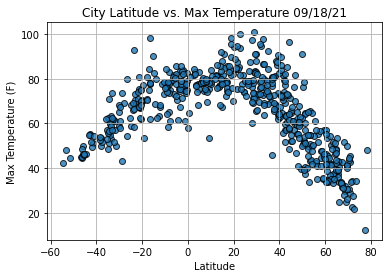

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


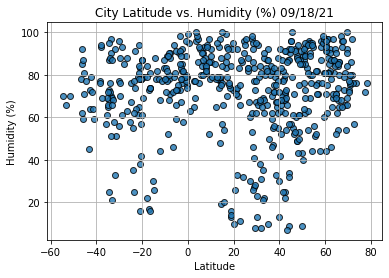

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

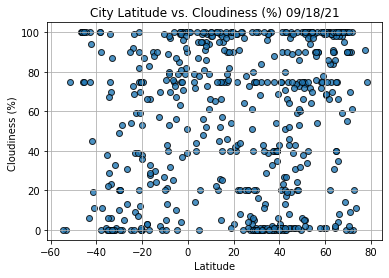

In [16]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%) ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

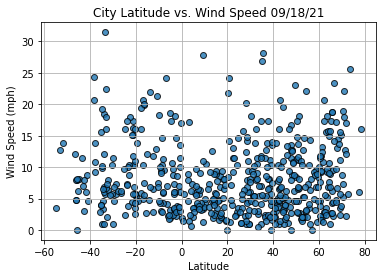

In [17]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Victoria,HK,2021-09-18 22:13:57,22.2855,114.1577,85.32,83,91,11.43
4,Tiksi,RU,2021-09-18 22:17:28,71.6872,128.8694,34.07,80,100,17.09
9,Talkha,EG,2021-09-18 22:17:31,31.0539,31.3779,69.84,79,0,5.37
10,Jamestown,US,2021-09-18 22:17:31,42.0970,-79.2353,74.30,78,1,10.36
14,Bafoulabe,ML,2021-09-18 22:17:33,13.8065,-10.8321,80.82,78,26,1.90
...,...,...,...,...,...,...,...,...,...
544,Olafsvik,IS,2021-09-18 22:21:28,64.8945,-23.7142,43.59,90,100,15.77
545,Ucluelet,CA,2021-09-18 22:19:29,48.9329,-125.5528,63.09,85,60,8.70
548,Batticaloa,LK,2021-09-18 22:21:30,7.7102,81.6924,79.90,82,93,3.33
549,Uspenka,UA,2021-09-18 22:21:30,48.3903,39.1619,60.48,61,61,12.64


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

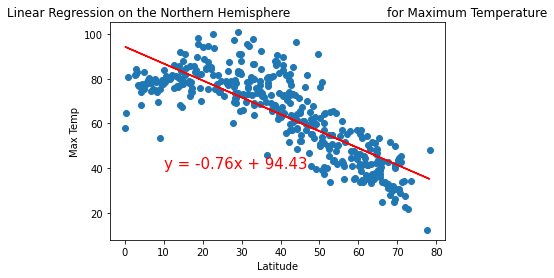

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

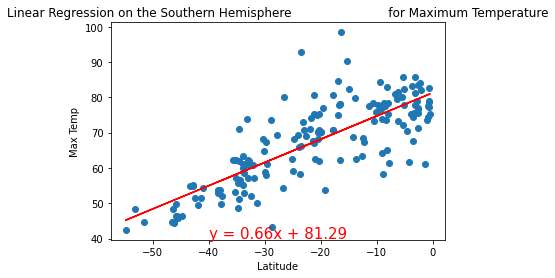

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-40
                                                              
                                                              ,40
                                                              
                                                             ))

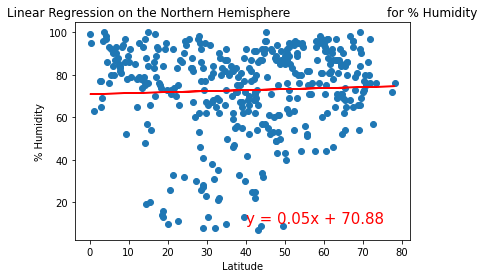

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

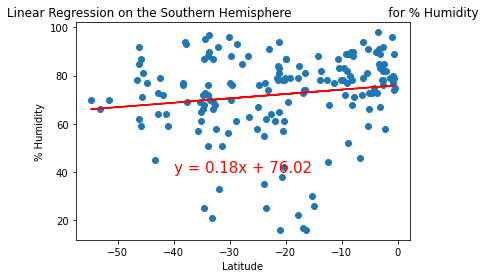

In [41]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-40,40))

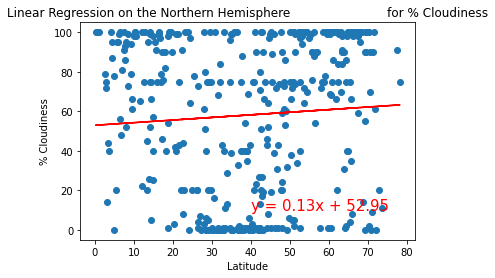

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

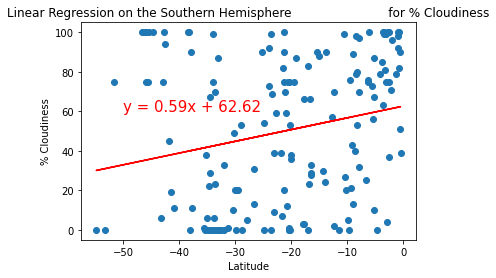

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

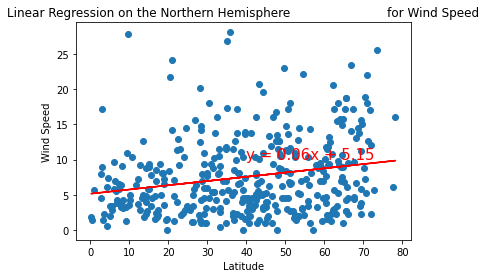

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

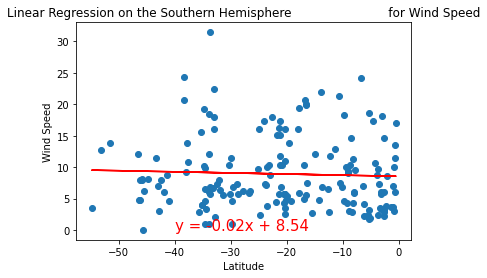

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,0))